In [1]:
import numpy as np
import pandas as pd
import string 
import spacy 
import re 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
%matplotlib inline 

In [2]:
elon_musk=pd.read_csv('Elon_musk.csv',encoding_errors='ignore')  
elon_musk = elon_musk.drop(['Unnamed: 0'],axis=1)
elon_musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
elon_musk_1 = elon_musk.copy()

In [4]:

elon_musk_1 = [Text.strip() for Text in elon_musk_1['Text']] 
elon_musk_1 = [Text for Text in elon_musk_1 if Text]
elon_musk_1[0:10] 

['@kunalb11 Im an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
# Joining the list into one string/text
text = ' '.join(elon_musk_1)
text[:10]

'@kunalb11 '

In [12]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tokens=tknzr.tokenize(text)
print(tokens)

['Im', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'Its', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', 'toddler', 

In [15]:
text_1 = ' '.join(tokens)

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(text_1)
print(text_tokens[0:5000]) 

['Im', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', 'Haha', 'thanks', ':', ')', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https', ':', '//t.co/3rWE9uHSTS', 'Its', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', '

[nltk_data] Downloading package punkt to C:\Users\Rohith
[nltk_data]     Challam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
len(text_1) 

118087

In [18]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', text_1)
no_url_text

'Im an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox !  Frodo was the underdoge , All thought he would fail , Himself most of all .  Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  Its getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha  Any crypto wallet that wont give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission !  Yes Once we can predict cash flo

In [19]:
#Punctuation
no_punc_text = text_1.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'Im an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS Its getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that wont give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on 

In [20]:
text_token = word_tokenize(no_punc_text)
print(text_token[0:5000])

['Im', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'httpstco3rWE9uHSTS', 'Its', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a',

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rohith
[nltk_data]     Challam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
stopword_list = ['rt','ye','yeah','haha','Yes','U0001F923','I','BLKMDL3','U0001F495','U0001F3B6']
my_stopwords.extend(stopword_list)
no_stop_tokens = [word for word in text_token if not word in my_stopwords]
print(no_stop_tokens[0:400]) 

['Im', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'httpstco3rWE9uHSTS', 'Its', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'httpstcoFc9uhQSd7O', 'Any', 'crypto', 'wallet', 'wont', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first

In [23]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['im', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new']


In [24]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [25]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

Im alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM Haha thanks Indeed


In [26]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'm', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy']


In [33]:
# TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['10', '100', '13', '20', '30', '300', '40', '4d', '60', '9s', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'casting', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'difference', 'different', 'do', 'dock', 'doge', 'd

C:\Users\Rohith Challam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

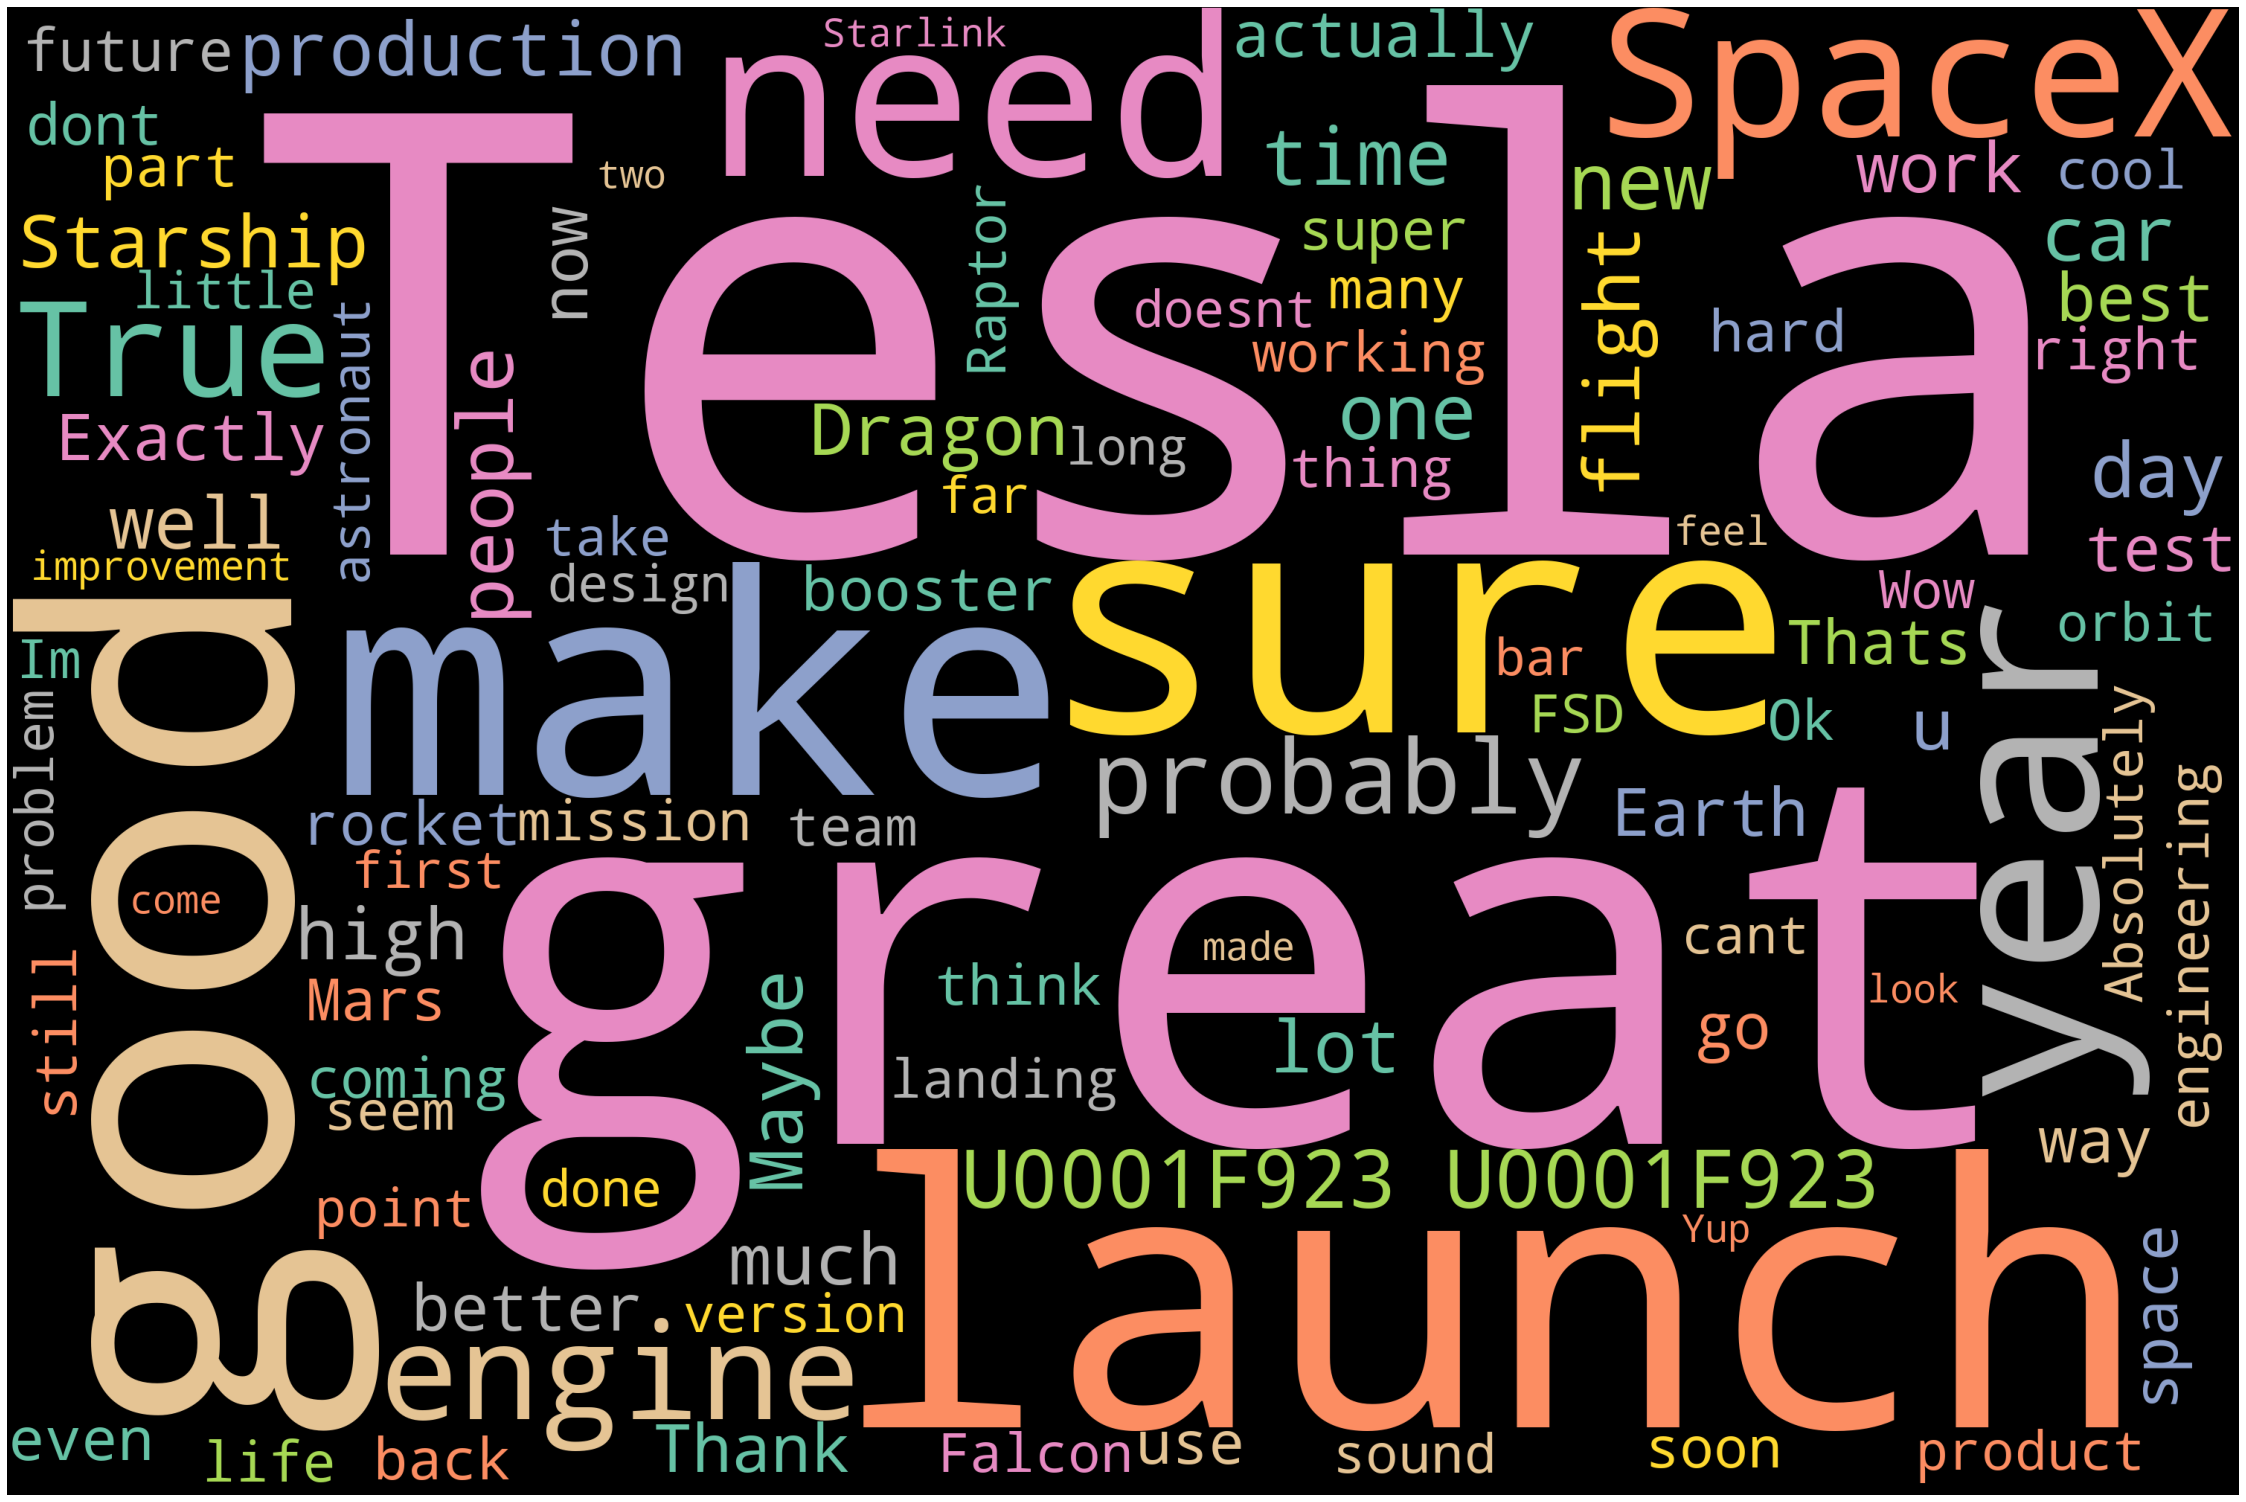

In [37]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('will')
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
stopwords.add('haha')
stopwords.add('Ye')
stopwords.add('Yes')
stopwords.add('U0001F')
stopwords.add('flcnhvy')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(no_punc_text)
# Plot
plot_cloud(wordcloud)

# Text mining 

In [39]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [40]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [41]:
#Create two new columns ‘Subjectivity’ & ‘Polarity’
elon_musk['Subjectivity'] = elon_musk['Text'].apply(getSubjectivity)
elon_musk['Polarity'] = elon_musk['Text'].apply(getPolarity)

In [42]:
elon_musk

,Text,Subjectivity,Polarity
0,@kunalb11 Im an alien,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000
2,@joerogan @Spotify Great interview!,0.750000,1.000000
3,@gtera27 Doge is underestimated,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",0.508333,0.111111
1995,@PPathole Make sure to read ur terms &amp; con...,0.888889,0.625000
1996,@TeslaGong @PPathole Samwise Gamgee,0.000000,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0.500000,-0.375000


In [43]:
 def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
        return TextBlob(text).apply(getAnalysis)

In [44]:
elon_musk['Analysis'] = elon_musk['Polarity'].apply(getAnalysis )
elon_musk

,Text,Subjectivity,Polarity,Analysis
0,@kunalb11 Im an alien,0.750000,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,0.750000,1.000000,Positive
3,@gtera27 Doge is underestimated,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",0.508333,0.111111,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,0.888889,0.625000,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0.500000,-0.375000,Negative


<AxesSubplot:>

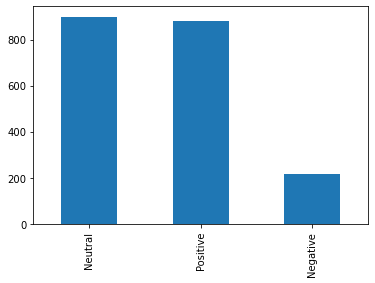

In [45]:
elon_musk['Analysis'].value_counts().plot(kind = 'bar')
# most of the tweet are positive in nature

In [46]:
# Sentiment score of the whole review
elon_musk.describe().T

,count,mean,std,min,25%,50%,75%,max
Subjectivity,1999.0,0.324252,0.322319,0.0,0.0,0.3,0.570714,1.0
Polarity,1999.0,0.131795,0.265354,-1.0,0.0,0.0,0.250000,1.0


In [ ]:
# as subjectivity greater 0 suggests the tweets are opinions 

In [47]:
# positive tweets 
elon_musk[elon_musk['Analysis']=='Positive']

,Text,Subjectivity,Polarity,Analysis
2,@joerogan @Spotify Great interview!,0.750000,1.000000,Positive
4,@teslacn Congratulations Tesla China for amazi...,0.366667,0.345313,Positive
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.727273,0.485227,Positive
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.500000,0.300000,Positive
9,The most entertaining outcome is the most likely,0.675000,0.375000,Positive
...,...,...,...,...
1986,Best use of the term Full Stack?,0.425000,0.675000,Positive
1987,@PPathole @IheartTesla For sure. This is both ...,0.879630,0.100000,Positive
1991,@IheartTesla No easy way to answer this in a t...,0.583333,0.016667,Positive
1994,"@flcnhvy True, it sounds so surreal, but the n...",0.508333,0.111111,Positive


In [48]:
# negative tweets 
elon_musk[elon_musk['Analysis']=='Negative']

,Text,Subjectivity,Polarity,Analysis
0,@kunalb11 Im an alien,0.750000,-0.250000,Negative
21,@freewalletorg Your app sucks,0.300000,-0.300000,Negative
25,@RationalEtienne @Adamklotz_ Starlink is a sta...,0.433333,-0.100000,Negative
26,@RationalEtienne @Adamklotz_ SpaceX needs to p...,0.266667,-0.100000,Negative
32,@SRuhle Everyone at Tesla receives stock. \n\n...,0.050000,-0.200000,Negative
...,...,...,...,...
1943,@teslaownersSV @engineers_feed The strength &a...,1.000000,-0.125000,Negative
1949,@katlinegrey Reusability is essential. A rocke...,0.432143,-0.160714,Negative
1958,@jgrano305 @TeslaratiTeam @Teslarati We have r...,0.214286,-0.071429,Negative
1989,"@buzzindelhi Sorry, should hopefully be soon!",1.000000,-0.625000,Negative


In [49]:
# neutral tweets 
# positive tweets 
elon_musk[elon_musk['Analysis']=='Neutral']

,Text,Subjectivity,Polarity,Analysis
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.0,0.0,Neutral
3,@gtera27 Doge is underestimated,0.0,0.0,Neutral
6,"Frodo was the underdoge,\nAll thought he would...",0.4,0.0,Neutral
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.5,0.0,Neutral
10,@GiveDirectly Just sent some,0.0,0.0,Neutral
...,...,...,...,...
1990,"@kenyanwalstreet Not actually a payout, just a...",0.1,0.0,Neutral
1992,AI symbiosis while u wait,0.0,0.0,Neutral
1993,@vistacruiser7 @flcnhvy Theres some of that too,0.0,0.0,Neutral
1996,@TeslaGong @PPathole Samwise Gamgee,0.0,0.0,Neutral
